# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [6]:
sales.query('sales > 10')  #oppure sales[sales['sales']>10]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [12]:
sales[sales['year'] == 2018]  #oppure sales.query('year == 2018')

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [ ]:
sales[(sales['sales'] > 13) & (sales['year'] == 2018)]  #oppure sales.query('sales > 13 and year == 2018')

,employee,sales,year
0,Katrina,14,2018


In [24]:
sales[~((sales["sales"]>13)&(sales["year"]==2018))] #oppure sales.query('not (sales > 13 and year == 2018)')

,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [ ]:
sales.query("sales/3 > 3")  #oppure sales[sales['sales']/3 > 3]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [ ]:
sales.query("employee > 'J'")   #o sales[(sales["employee"] > "J")] 

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
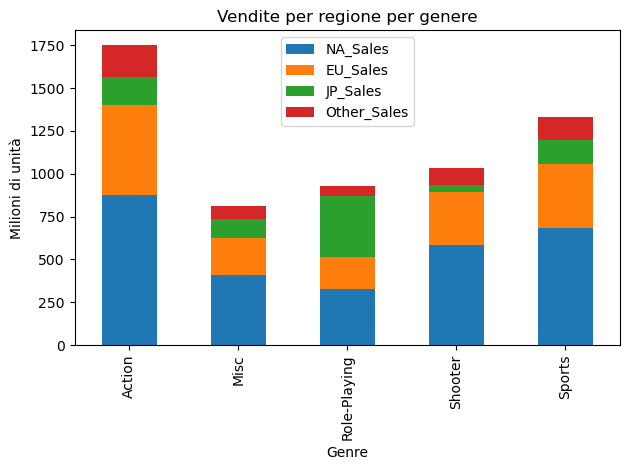


In [58]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [35]:
df['Name'].nunique()

11493

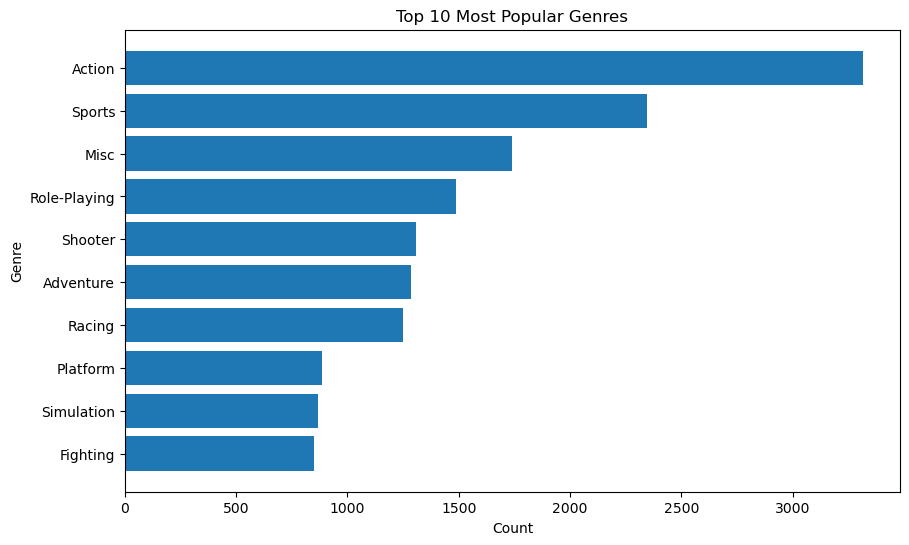

In [49]:
genre_counts = df['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(genre_counts.index[::-1], genre_counts.values[::-1])
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 10 Most Popular Genres')
plt.show()

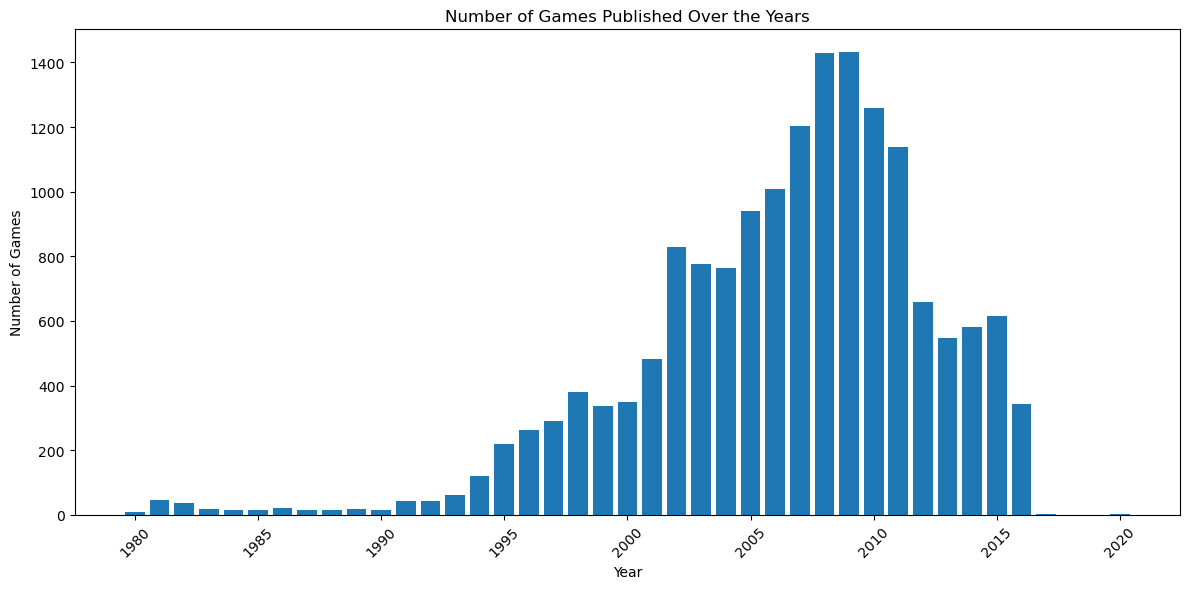

In [55]:
year_count = df['Year'].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(year_count.index, year_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Published Over the Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          877.83    525.00    159.95       187.38
Adventure       105.80     64.13     52.07        16.81
Fighting        223.59    101.32     87.35        36.68
Misc            410.24    215.98    107.76        75.32
Platform        447.05    201.63    130.77        51.59
Puzzle          123.78     50.78     57.31        12.55
Racing          359.42    238.39     56.69        77.27
Role-Playing    327.28    188.06    352.31        59.61
Shooter         582.60    313.27     38.28       102.69
Simulation      183.31    113.38     63.70        31.52
Sports          683.35    376.85    135.37       134.97
Strategy         68.70     45.34     49.46        11.36


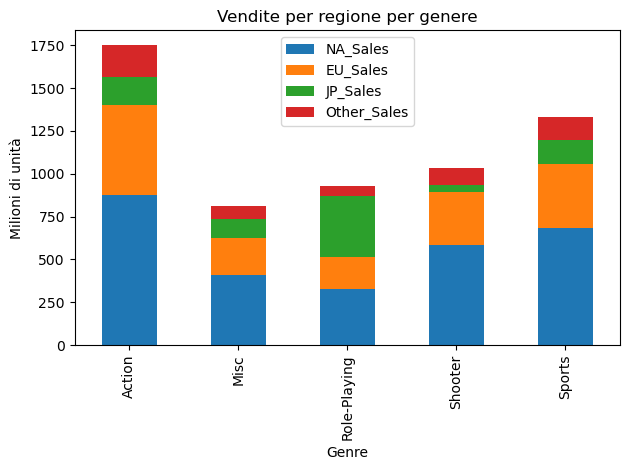

In [72]:
sales_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(sales_by_genre)

# Filtra i generi desiderati
selected_genres = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
sales_by_genre_2 = sales_by_genre.loc[selected_genres]

# Plot
sales_by_genre_2.plot(kind='bar', stacked=True)
plt.title('Vendite per regione per genere')
plt.xlabel('Genre')
plt.ylabel('Milioni di unità')
plt.legend()
plt.tight_layout()
plt.show()
